# Fashion MNIST 
 
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"  height='300' width='500'/>
 
 
Fashion MNIST is a collection of 28x28 images containing 70,000 grayscale images in 10 categories. In this notebook we will analyze this dataset using two diferent neural networks: a fully connected network and a convolutional network.

## Fully Connected Network

In [1]:
# imports for array-handling and plotting
%matplotlib inline

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(10)

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import fashion_mnist

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 5s 1us/step


In [3]:
## Show the dimentions of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
y_train[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

<BarContainer object of 10 artists>

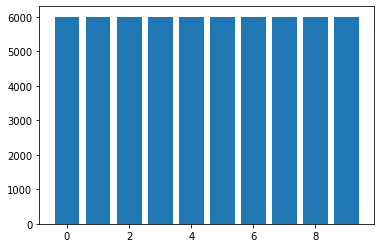

In [5]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

## plot the frequency of y's
plt.bar(yn[0],yn[1])

We now check the first nine data rows (pictures) and check their labels:

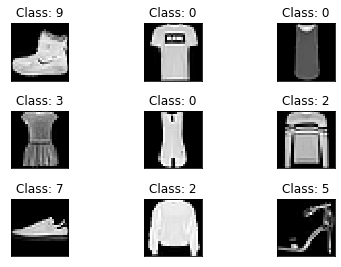

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
<code> 
Label	Class
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot
</code> 
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:               

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

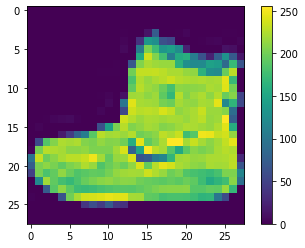

In [8]:
### images have values between 0 and 255

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [9]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

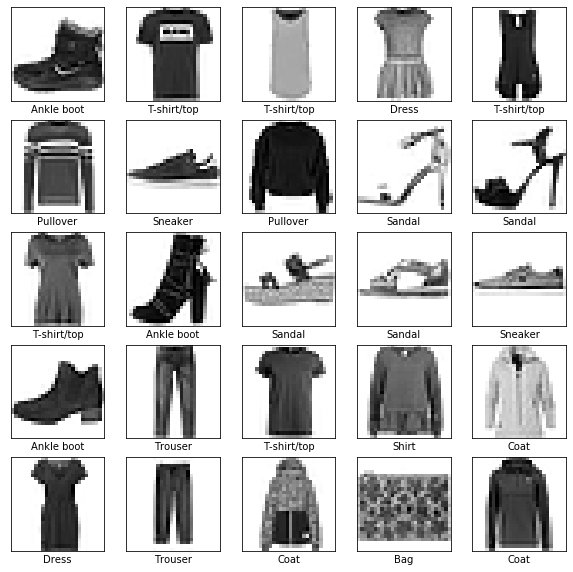

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])


Before procedding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [13]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### First model based on Categorical Crossentropy as loss function

Now we will compile the model

Now we will proceed to build the network architecture. Our input layer consist on:

 1. A two dimentional matrix of 28x28. We will use a flatten layer as the first layer, what gives a layer with 784 nodes. 
 2. Then we will use a fully connected layer (dense) with 128 nodes, followed with a relu  activation layer. 
 3. Then another fully connected layer of 10 nodes, activated with a softmax layer. 
 4. The output layer consist of 10 nodes.

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [15]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

and fit it...

In [16]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.5560 - acc: 0.8071 - val_loss: 0.4415 - val_acc: 0.8444
Epoch 2/20
 - 2s - loss: 0.4020 - acc: 0.8604 - val_loss: 0.4066 - val_acc: 0.8560
Epoch 3/20
 - 2s - loss: 0.3667 - acc: 0.8706 - val_loss: 0.3865 - val_acc: 0.8642
Epoch 4/20
 - 2s - loss: 0.3396 - acc: 0.8792 - val_loss: 0.3724 - val_acc: 0.8671
Epoch 5/20
 - 4s - loss: 0.3194 - acc: 0.8856 - val_loss: 0.3731 - val_acc: 0.8675
Epoch 6/20
 - 2s - loss: 0.3068 - acc: 0.8896 - val_loss: 0.3745 - val_acc: 0.8633
Epoch 7/20
 - 2s - loss: 0.2929 - acc: 0.8939 - val_loss: 0.3546 - val_acc: 0.8732
Epoch 8/20
 - 2s - loss: 0.2824 - acc: 0.8964 - val_loss: 0.3471 - val_acc: 0.8750
Epoch 9/20
 - 4s - loss: 0.2707 - acc: 0.9022 - val_loss: 0.3423 - val_acc: 0.8775
Epoch 10/20
 - 2s - loss: 0.2636 - acc: 0.9024 - val_loss: 0.3414 - val_acc: 0.8769
Epoch 11/20
 - 3s - loss

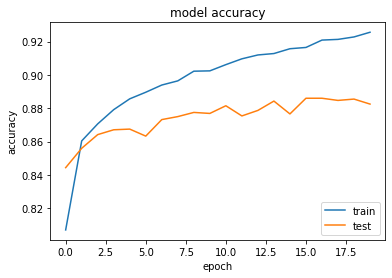

In [17]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

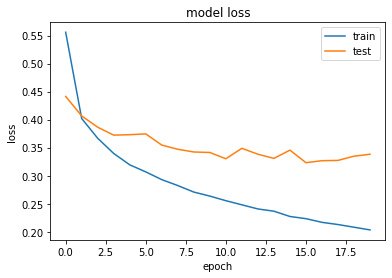

In [18]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


### Second model based on Sparse Categorical Crossentropy as loss function


In [19]:
# compiling the sequential model
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
##### here we use the labels without one-hot-encoding !!!

res = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.1978 - acc: 0.9276 - val_loss: 0.3424 - val_acc: 0.8822
Epoch 2/20
 - 2s - loss: 0.1943 - acc: 0.9282 - val_loss: 0.3229 - val_acc: 0.8892
Epoch 3/20
 - 2s - loss: 0.1873 - acc: 0.9311 - val_loss: 0.3383 - val_acc: 0.8847
Epoch 4/20
 - 2s - loss: 0.1854 - acc: 0.9317 - val_loss: 0.3329 - val_acc: 0.8876
Epoch 5/20
 - 2s - loss: 0.1797 - acc: 0.9346 - val_loss: 0.3434 - val_acc: 0.8872
Epoch 6/20
 - 2s - loss: 0.1753 - acc: 0.9355 - val_loss: 0.3476 - val_acc: 0.8828
Epoch 7/20
 - 3s - loss: 0.1714 - acc: 0.9370 - val_loss: 0.3397 - val_acc: 0.8888
Epoch 8/20
 - 2s - loss: 0.1692 - acc: 0.9379 - val_loss: 0.3355 - val_acc: 0.8904
Epoch 9/20
 - 2s - loss: 0.1646 - acc: 0.9390 - val_loss: 0.3422 - val_acc: 0.8880
Epoch 10/20
 - 2s - loss: 0.1607 - acc: 0.9417 - val_loss: 0.3543 - val_acc: 0.8866
Epoch 11/20
 - 2s - loss: 0.1563 - acc: 0.9432 - val_loss: 0.3631 - val_acc: 0.8825
Epoch 12/20
 - 2s - loss: 0.1549 - 

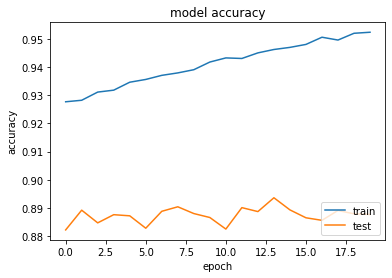

In [21]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

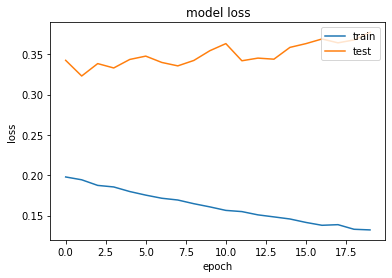

In [22]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


##  Third model - now we will add dropout layers

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.6659 - acc: 0.7664 - val_loss: 0.4855 - val_acc: 0.8284
Epoch 2/20
 - 3s - loss: 0.4891 - acc: 0.8235 - val_loss: 0.4398 - val_acc: 0.8463
Epoch 3/20
 - 3s - loss: 0.4484 - acc: 0.8391 - val_loss: 0.4107 - val_acc: 0.8523
Epoch 4/20
 - 3s - loss: 0.4228 - acc: 0.8456 - val_loss: 0.3905 - val_acc: 0.8594
Epoch 5/20
 - 5s - loss: 0.4091 - acc: 0.8492 - val_loss: 0.3808 - val_acc: 0.8620
Epoch 6/20
 - 4s - loss: 0.3908 - acc: 0.8570 - val_loss: 0.3673 - val_acc: 0.8701
Epoch 7/20
 - 3s - loss: 0.3845 - acc: 0.8575 - val_loss: 0.3638 - val_acc: 0.8679
Epoch 8/20
 - 3s - loss: 0.3745 - acc: 0.8616 - val_loss: 0.3613 - val_acc: 0.8738
Epoch 9/20
 - 4s - loss: 0.3692 - acc: 0.8622 - val_loss: 0.3523 - val_acc: 0.8743
Epoch 10/20
 - 4s - loss: 0.3643 - acc: 0.8659 - val_loss: 0.3470 - val_acc: 0.8750
Epoch 11/20
 - 3s - loss: 0.3574 - acc: 0.8675 - val_loss: 0.3500 - val_acc: 0.8727
Epoch 12/20
 - 3s - loss: 0.3551 - 

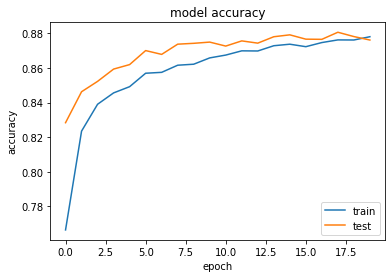

In [26]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

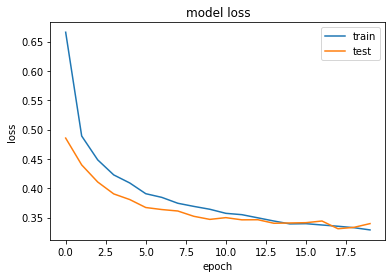

In [27]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fourth model - Additional layer



In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.20))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.30))

model.add(Dense(10))
model.add(Activation('softmax'))


In [29]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [30]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.7640 - acc: 0.7312 - val_loss: 0.4771 - val_acc: 0.8293
Epoch 2/20
 - 4s - loss: 0.5096 - acc: 0.8183 - val_loss: 0.4238 - val_acc: 0.8434
Epoch 3/20
 - 4s - loss: 0.4641 - acc: 0.8324 - val_loss: 0.4189 - val_acc: 0.8480
Epoch 4/20
 - 4s - loss: 0.4386 - acc: 0.8420 - val_loss: 0.3917 - val_acc: 0.8577
Epoch 5/20
 - 4s - loss: 0.4206 - acc: 0.8467 - val_loss: 0.3856 - val_acc: 0.8586
Epoch 6/20
 - 4s - loss: 0.4092 - acc: 0.8498 - val_loss: 0.3702 - val_acc: 0.8648
Epoch 7/20
 - 6s - loss: 0.3967 - acc: 0.8556 - val_loss: 0.3720 - val_acc: 0.8651
Epoch 8/20
 - 9s - loss: 0.3932 - acc: 0.8572 - val_loss: 0.3572 - val_acc: 0.8678
Epoch 9/20
 - 4s - loss: 0.3837 - acc: 0.8611 - val_loss: 0.3489 - val_acc: 0.8736
Epoch 10/20
 - 5s - loss: 0.3722 - acc: 0.8643 - val_loss: 0.3552 - val_acc: 0.8732
Epoch 11/20
 - 5s - loss: 0.3724 - acc: 0.8637 - val_loss: 0.3500 - val_acc: 0.8695
Epoch 12/20
 - 7s - loss: 0.3665 - 

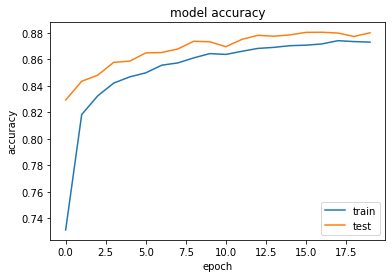

In [31]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

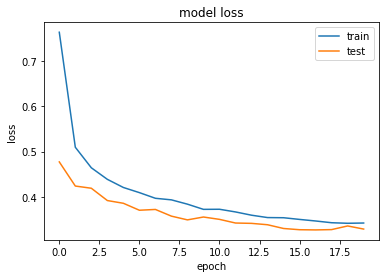

In [32]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fifth model - Convolutional Neural Networks


In [33]:
## data preprocessing

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [34]:
model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1),padding='same',activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
          
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [35]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
__________

In [37]:
res = model.fit(X_train, Y_train,
          batch_size=1000, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 90s - loss: 1.1617 - acc: 0.5705 - val_loss: 0.7141 - val_acc: 0.7348
Epoch 2/20
 - 90s - loss: 0.6587 - acc: 0.7498 - val_loss: 0.5596 - val_acc: 0.7881
Epoch 3/20
 - 96s - loss: 0.5663 - acc: 0.7887 - val_loss: 0.4958 - val_acc: 0.8180
Epoch 4/20
 - 93s - loss: 0.5094 - acc: 0.8120 - val_loss: 0.4389 - val_acc: 0.8415
Epoch 5/20
 - 92s - loss: 0.4662 - acc: 0.8286 - val_loss: 0.4061 - val_acc: 0.8557
Epoch 6/20
 - 90s - loss: 0.4379 - acc: 0.8397 - val_loss: 0.3924 - val_acc: 0.8599
Epoch 7/20
 - 105s - loss: 0.4131 - acc: 0.8495 - val_loss: 0.3603 - val_acc: 0.8722
Epoch 8/20
 - 90s - loss: 0.3940 - acc: 0.8576 - val_loss: 0.3458 - val_acc: 0.8756
Epoch 9/20
 - 88s - loss: 0.3759 - acc: 0.8623 - val_loss: 0.3329 - val_acc: 0.8793
Epoch 10/20
 - 87s - loss: 0.3620 - acc: 0.8675 - val_loss: 0.3241 - val_acc: 0.8820
Epoch 11/20
 - 87s - loss: 0.3506 - acc: 0.8711 - val_loss: 0.3158 - val_acc: 0.8848
Epoch 12/20
 - 83s - lo

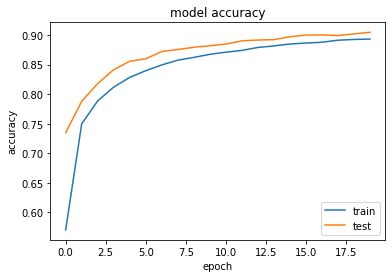

In [38]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

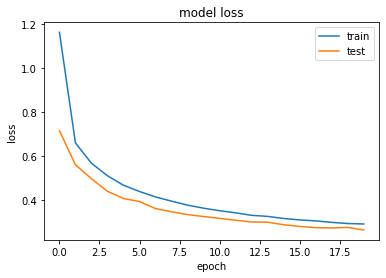

In [39]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [40]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(14,14))
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{} | Pred:{}".format(labels[y_test[indx]],labels[predicted_classes[indx]]))
    plt.show()    

In [41]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)


In [42]:
p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [43]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9048
Incorrect predicted classes: 952


In [48]:
from sklearn.metrics import classification_report
#target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



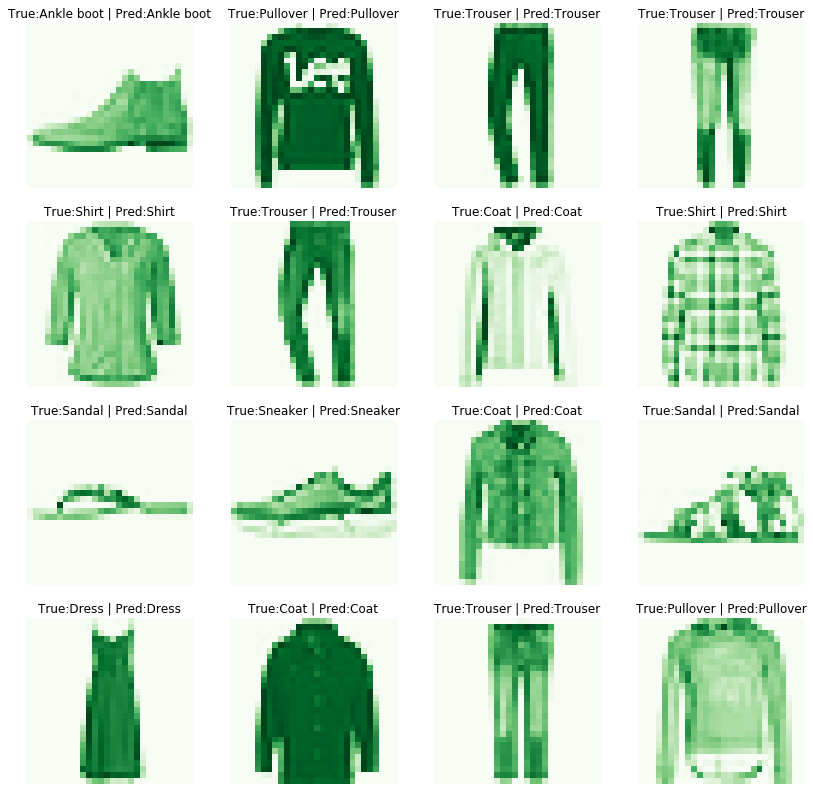

In [49]:
plot_images(correct, "Greens")

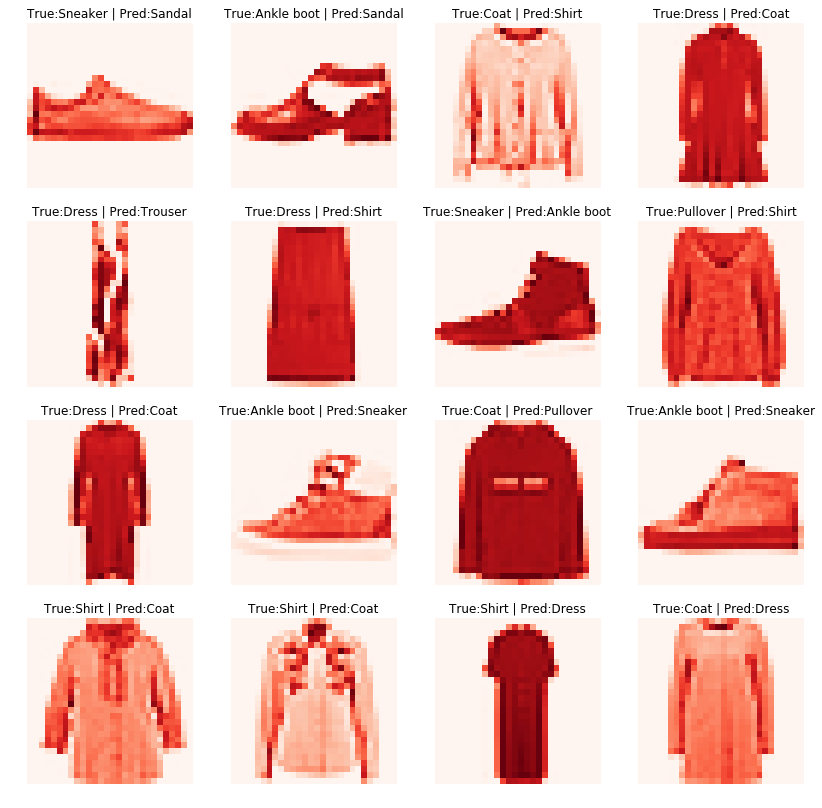

In [50]:
plot_images(incorrect, "Reds")